In [3]:
# Andrew Ivanov

# Part 1 Collecting the Data
# Step 1 SPY will be used as our S&P 500 Data

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib notebook
import math
from pandas.io.json import json_normalize
import sklearn as sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Connect to Datasets
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SPY&outputsize=full&apikey=0ZA7MY35JKOC4AFM'
resp = requests.get(url)
resp

<Response [200]>

In [4]:
data = resp.json()
json_normalize(data).head()

,Meta Data.1. Information,Meta Data.2. Symbol,Meta Data.3. Last Refreshed,Meta Data.4. Output Size,Meta Data.5. Time Zone,Time Series (Daily).2020-12-28.1. open,Time Series (Daily).2020-12-28.2. high,Time Series (Daily).2020-12-28.3. low,Time Series (Daily).2020-12-28.4. close,Time Series (Daily).2020-12-28.5. adjusted close,...,Time Series (Daily).1999-11-02.7. dividend amount,Time Series (Daily).1999-11-02.8. split coefficient,Time Series (Daily).1999-11-01.1. open,Time Series (Daily).1999-11-01.2. high,Time Series (Daily).1999-11-01.3. low,Time Series (Daily).1999-11-01.4. close,Time Series (Daily).1999-11-01.5. adjusted close,Time Series (Daily).1999-11-01.6. volume,Time Series (Daily).1999-11-01.7. dividend amount,Time Series (Daily).1999-11-01.8. split coefficient
0,Daily Time Series with Splits and Dividend Events,SPY,2020-12-28,Full size,US/Eastern,371.74,372.59,371.07,372.17,372.17,...,0.0000,1.0,136.5,137.0,135.5625,135.5625,91.2092777132,4006500,0.0000,1.0


In [16]:
frame = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
frame = frame.T
dateRange = pd.DataFrame(frame.loc['2019-12-31':'2019-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1]


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-01-02,245.98,251.21,245.95,250.18,240.948765662,126925199,0.0000,1.0
2019-01-03,248.23,248.57,243.67,244.21,235.199048934,144140692,0.0000,1.0
2019-01-04,247.59,253.11,247.17,252.39,243.077220263,142628834,0.0000,1.0
2019-01-07,252.69,255.95,251.69,254.38,244.993792505,103139100,0.0000,1.0
2019-01-08,256.82,257.31,254.0,256.77,247.2956054,102512587,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-12-24,321.47,321.52,320.9,321.23,315.230313244,20270007,0.0000,1.0
2019-12-26,321.65,322.95,321.64,322.94,316.90837518,30854382,0.0000,1.0
2019-12-27,323.74,323.8,322.28,322.86,316.829869358,42523486,0.0000,1.0
2019-12-30,322.95,323.1,320.55,321.08,315.083114828,49652827,0.0000,1.0


In [17]:
# display the new date range 
SPY2019 = dateRange
SPY2019 

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-12-31,320.53,322.13,320.15,321.86,315.848546589,57059907,0.0000,1.0
2019-12-30,322.95,323.1,320.55,321.08,315.083114828,49652827,0.0000,1.0
2019-12-27,323.74,323.8,322.28,322.86,316.829869358,42523486,0.0000,1.0
2019-12-26,321.65,322.95,321.64,322.94,316.90837518,30854382,0.0000,1.0
2019-12-24,321.47,321.52,320.9,321.23,315.230313244,20270007,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-01-08,256.82,257.31,254.0,256.77,247.2956054,102512587,0.0000,1.0
2019-01-07,252.69,255.95,251.69,254.38,244.993792505,103139100,0.0000,1.0
2019-01-04,247.59,253.11,247.17,252.39,243.077220263,142628834,0.0000,1.0
2019-01-03,248.23,248.57,243.67,244.21,235.199048934,144140692,0.0000,1.0


In [18]:
SPY2019 = SPY2019.iloc[:, 0:4]
SPY2019.columns = ['Open', 'High', "Low", "Close"]
SPY2019 = SPY2019.sort_index()
SPY2019

,Open,High,Low,Close
2019-01-02,245.98,251.21,245.95,250.18
2019-01-03,248.23,248.57,243.67,244.21
2019-01-04,247.59,253.11,247.17,252.39
2019-01-07,252.69,255.95,251.69,254.38
2019-01-08,256.82,257.31,254.0,256.77
...,...,...,...,...
2019-12-24,321.47,321.52,320.9,321.23
2019-12-26,321.65,322.95,321.64,322.94
2019-12-27,323.74,323.8,322.28,322.86
2019-12-30,322.95,323.1,320.55,321.08


In [19]:
SPY2019["High"] = SPY2019.astype(float)
SPY2019["Open"] = SPY2019.astype(float)
SPY2019["Low"] = SPY2019.astype(float)
SPY2019["Close"] = SPY2019.astype(float)


In [20]:
SPY2019.reset_index(inplace = True)
SPY2019 = SPY2019.rename (columns = {'index':'Date'})
SPY2019

,Date,Open,High,Low,Close
0,2019-01-02,245.98,245.98,245.98,245.98
1,2019-01-03,248.23,248.23,248.23,248.23
2,2019-01-04,247.59,247.59,247.59,247.59
3,2019-01-07,252.69,252.69,252.69,252.69
4,2019-01-08,256.82,256.82,256.82,256.82
...,...,...,...,...,...
247,2019-12-24,321.47,321.47,321.47,321.47
248,2019-12-26,321.65,321.65,321.65,321.65
249,2019-12-27,323.74,323.74,323.74,323.74
250,2019-12-30,322.95,322.95,322.95,322.95


In [21]:
# Step 2 The GLD ETF will be our second asset
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GLD&outputsize=full&apikey=0ZA7MY35JKOC4AFM'
resp = requests.get(url)
resp

<Response [200]>

In [22]:
data = resp.json()
json_normalize(data).head()

,Meta Data.1. Information,Meta Data.2. Symbol,Meta Data.3. Last Refreshed,Meta Data.4. Output Size,Meta Data.5. Time Zone,Time Series (Daily).2020-12-28.1. open,Time Series (Daily).2020-12-28.2. high,Time Series (Daily).2020-12-28.3. low,Time Series (Daily).2020-12-28.4. close,Time Series (Daily).2020-12-28.5. adjusted close,...,Time Series (Daily).2004-11-19.7. dividend amount,Time Series (Daily).2004-11-19.8. split coefficient,Time Series (Daily).2004-11-18.1. open,Time Series (Daily).2004-11-18.2. high,Time Series (Daily).2004-11-18.3. low,Time Series (Daily).2004-11-18.4. close,Time Series (Daily).2004-11-18.5. adjusted close,Time Series (Daily).2004-11-18.6. volume,Time Series (Daily).2004-11-18.7. dividend amount,Time Series (Daily).2004-11-18.8. split coefficient
0,Daily Time Series with Splits and Dividend Events,GLD,2020-12-28,Full size,US/Eastern,177.26,177.91,175.625,175.71,175.71,...,0.0000,1.0,44.43,44.49,44.07,44.38,44.38,5992000,0.0000,1.0


In [23]:
frame = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
frame = frame.T
dateRange = pd.DataFrame(frame.loc['2019-12-31':'2019-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-01-02,121.35,121.75,120.88,121.33,121.33,12776155,0.0000,1.0
2019-01-03,121.78,122.46,121.73,122.43,122.43,15440840,0.0000,1.0
2019-01-04,121.32,121.6,120.69,121.44,121.44,13334368,0.0000,1.0
2019-01-07,122.16,122.22,121.5731,121.86,121.86,7473641,0.0000,1.0
2019-01-08,121.15,121.71,121.06,121.53,121.53,7643363,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-12-24,140.4401,141.33,140.43,141.27,141.27,5303698,0.0000,1.0
2019-12-26,142.06,142.47,141.9062,142.38,142.38,8338329,0.0000,1.0
2019-12-27,142.26,142.73,142.17,142.33,142.33,5119883,0.0000,1.0
2019-12-30,142.57,142.8,142.46,142.63,142.63,4810215,0.0000,1.0


In [24]:
Gold2019 = dateRange
Gold2019

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-12-31,143.31,143.605,142.8,142.9,142.9,5312671,0.0000,1.0
2019-12-30,142.57,142.8,142.46,142.63,142.63,4810215,0.0000,1.0
2019-12-27,142.26,142.73,142.17,142.33,142.33,5119883,0.0000,1.0
2019-12-26,142.06,142.47,141.9062,142.38,142.38,8338329,0.0000,1.0
2019-12-24,140.4401,141.33,140.43,141.27,141.27,5303698,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-01-08,121.15,121.71,121.06,121.53,121.53,7643363,0.0000,1.0
2019-01-07,122.16,122.22,121.5731,121.86,121.86,7473641,0.0000,1.0
2019-01-04,121.32,121.6,120.69,121.44,121.44,13334368,0.0000,1.0
2019-01-03,121.78,122.46,121.73,122.43,122.43,15440840,0.0000,1.0


In [25]:
Gold2019 = Gold2019.iloc[:, 0:4]
Gold2019.columns = ['Open', 'High', "Low", "Close"]
Gold2019

,Open,High,Low,Close
2019-12-31,143.31,143.605,142.8,142.9
2019-12-30,142.57,142.8,142.46,142.63
2019-12-27,142.26,142.73,142.17,142.33
2019-12-26,142.06,142.47,141.9062,142.38
2019-12-24,140.4401,141.33,140.43,141.27
...,...,...,...,...
2019-01-08,121.15,121.71,121.06,121.53
2019-01-07,122.16,122.22,121.5731,121.86
2019-01-04,121.32,121.6,120.69,121.44
2019-01-03,121.78,122.46,121.73,122.43


In [26]:
Gold2019 = Gold2019.sort_index()
Gold2019

,Open,High,Low,Close
2019-01-02,121.35,121.75,120.88,121.33
2019-01-03,121.78,122.46,121.73,122.43
2019-01-04,121.32,121.6,120.69,121.44
2019-01-07,122.16,122.22,121.5731,121.86
2019-01-08,121.15,121.71,121.06,121.53
...,...,...,...,...
2019-12-24,140.4401,141.33,140.43,141.27
2019-12-26,142.06,142.47,141.9062,142.38
2019-12-27,142.26,142.73,142.17,142.33
2019-12-30,142.57,142.8,142.46,142.63


In [27]:
Gold2019["Open"] = Gold2019.astype(float)
Gold2019["High"] = Gold2019.astype(float)
Gold2019["Low"] = Gold2019.astype(float)
Gold2019["Close"] = Gold2019.astype(float)
Gold2019.dtypes


Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [28]:
Gold2019.reset_index(inplace= True)
Gold2019 = Gold2019.rename(columns={'index': 'Date'})
Gold2019

,Date,Open,High,Low,Close
0,2019-01-02,121.3500,121.3500,121.3500,121.3500
1,2019-01-03,121.7800,121.7800,121.7800,121.7800
2,2019-01-04,121.3200,121.3200,121.3200,121.3200
3,2019-01-07,122.1600,122.1600,122.1600,122.1600
4,2019-01-08,121.1500,121.1500,121.1500,121.1500
...,...,...,...,...,...
247,2019-12-24,140.4401,140.4401,140.4401,140.4401
248,2019-12-26,142.0600,142.0600,142.0600,142.0600
249,2019-12-27,142.2600,142.2600,142.2600,142.2600
250,2019-12-30,142.5700,142.5700,142.5700,142.5700


In [35]:
# The next asset will be Amazon
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMZN&outputsize=full&apikey=0ZA7MY35JKOC4AFM'
resp = requests.get(url)
resp


<Response [200]>

In [37]:
data = resp.json()
json_normalize(data).head()


,Meta Data.1. Information,Meta Data.2. Symbol,Meta Data.3. Last Refreshed,Meta Data.4. Output Size,Meta Data.5. Time Zone,Time Series (Daily).2020-12-28.1. open,Time Series (Daily).2020-12-28.2. high,Time Series (Daily).2020-12-28.3. low,Time Series (Daily).2020-12-28.4. close,Time Series (Daily).2020-12-28.5. adjusted close,...,Time Series (Daily).1999-11-02.7. dividend amount,Time Series (Daily).1999-11-02.8. split coefficient,Time Series (Daily).1999-11-01.1. open,Time Series (Daily).1999-11-01.2. high,Time Series (Daily).1999-11-01.3. low,Time Series (Daily).1999-11-01.4. close,Time Series (Daily).1999-11-01.5. adjusted close,Time Series (Daily).1999-11-01.6. volume,Time Series (Daily).1999-11-01.7. dividend amount,Time Series (Daily).1999-11-01.8. split coefficient
0,Daily Time Series with Splits and Dividend Events,AMZN,2020-12-28,Full size,US/Eastern,3194.0,3304.0,3172.69,3283.96,3283.96,...,0.0000,1.0,68.06,71.88,66.31,69.13,69.13,12824100,0.0000,1.0


In [38]:
frame = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
frame = frame.T
dateRange = pd.DataFrame(frame.loc['2019-12-31':'2019-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-01-02,1465.2,1553.36,1460.93,1539.13,1539.13,7983103,0.0000,1.0
2019-01-03,1520.01,1538.0,1497.11,1500.28,1500.28,6975572,0.0000,1.0
2019-01-04,1530.0,1594.0,1518.31,1575.39,1575.39,9182575,0.0000,1.0
2019-01-07,1602.31,1634.56,1589.18,1629.51,1629.51,7993213,0.0000,1.0
2019-01-08,1664.69,1676.61,1616.61,1656.58,1656.58,8881428,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-12-24,1793.81,1795.57,1787.58,1789.21,1789.21,881337,0.0000,1.0
2019-12-26,1801.01,1870.46,1799.5,1868.77,1868.77,6024608,0.0000,1.0
2019-12-27,1882.92,1901.4,1866.01,1869.8,1869.8,6188754,0.0000,1.0
2019-12-30,1874.0,1884.0,1840.62,1846.89,1846.89,3677306,0.0000,1.0


In [39]:
Amazon2019 = dateRange
Amazon2019

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-12-31,1842.0,1853.26,1832.23,1847.84,1847.84,2510380,0.0000,1.0
2019-12-30,1874.0,1884.0,1840.62,1846.89,1846.89,3677306,0.0000,1.0
2019-12-27,1882.92,1901.4,1866.01,1869.8,1869.8,6188754,0.0000,1.0
2019-12-26,1801.01,1870.46,1799.5,1868.77,1868.77,6024608,0.0000,1.0
2019-12-24,1793.81,1795.57,1787.58,1789.21,1789.21,881337,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-01-08,1664.69,1676.61,1616.61,1656.58,1656.58,8881428,0.0000,1.0
2019-01-07,1602.31,1634.56,1589.18,1629.51,1629.51,7993213,0.0000,1.0
2019-01-04,1530.0,1594.0,1518.31,1575.39,1575.39,9182575,0.0000,1.0
2019-01-03,1520.01,1538.0,1497.11,1500.28,1500.28,6975572,0.0000,1.0


In [40]:
Amazon2019 = Amazon2019.iloc[:, 0:4]
Amazon2019.columns = ['Open', 'High', "Low", "Close"]
Amazon2019

,Open,High,Low,Close
2019-12-31,1842.0,1853.26,1832.23,1847.84
2019-12-30,1874.0,1884.0,1840.62,1846.89
2019-12-27,1882.92,1901.4,1866.01,1869.8
2019-12-26,1801.01,1870.46,1799.5,1868.77
2019-12-24,1793.81,1795.57,1787.58,1789.21
...,...,...,...,...
2019-01-08,1664.69,1676.61,1616.61,1656.58
2019-01-07,1602.31,1634.56,1589.18,1629.51
2019-01-04,1530.0,1594.0,1518.31,1575.39
2019-01-03,1520.01,1538.0,1497.11,1500.28


In [41]:
Amazon2019["Open"] = Amazon2019.astype(float)
Amazon2019["High"] = Amazon2019.astype(float)
Amazon2019["Low"] = Amazon2019.astype(float)
Amazon2019["Close"] = Amazon2019.astype(float)
Amazon2019 = Amazon2019.sort_index()
Amazon2019

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Open,High,Low,Close
2019-01-02,1465.20,1465.20,1465.20,1465.20
2019-01-03,1520.01,1520.01,1520.01,1520.01
2019-01-04,1530.00,1530.00,1530.00,1530.00
2019-01-07,1602.31,1602.31,1602.31,1602.31
2019-01-08,1664.69,1664.69,1664.69,1664.69
...,...,...,...,...
2019-12-24,1793.81,1793.81,1793.81,1793.81
2019-12-26,1801.01,1801.01,1801.01,1801.01
2019-12-27,1882.92,1882.92,1882.92,1882.92
2019-12-30,1874.00,1874.00,1874.00,1874.00


In [42]:
Amazon2019.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [43]:
Amazon2019.reset_index(inplace= True)
Amazon2019 = Amazon2019.rename (columns = {'index': 'Date'})
Amazon2019.head()

,Date,Open,High,Low,Close
0,2019-01-02,1465.20,1465.20,1465.20,1465.20
1,2019-01-03,1520.01,1520.01,1520.01,1520.01
2,2019-01-04,1530.00,1530.00,1530.00,1530.00
3,2019-01-07,1602.31,1602.31,1602.31,1602.31
4,2019-01-08,1664.69,1664.69,1664.69,1664.69


In [49]:
# The next asset will be Walmart
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=WMT&outputsize=full&apikey=0ZA7MY35JKOC4AFM'
resp = requests.get(url)
resp

<Response [200]>

In [50]:
data = resp.json()
json_normalize(data).head()

,Meta Data.1. Information,Meta Data.2. Symbol,Meta Data.3. Last Refreshed,Meta Data.4. Output Size,Meta Data.5. Time Zone,Time Series (Daily).2020-12-28.1. open,Time Series (Daily).2020-12-28.2. high,Time Series (Daily).2020-12-28.3. low,Time Series (Daily).2020-12-28.4. close,Time Series (Daily).2020-12-28.5. adjusted close,...,Time Series (Daily).1999-11-02.7. dividend amount,Time Series (Daily).1999-11-02.8. split coefficient,Time Series (Daily).1999-11-01.1. open,Time Series (Daily).1999-11-01.2. high,Time Series (Daily).1999-11-01.3. low,Time Series (Daily).1999-11-01.4. close,Time Series (Daily).1999-11-01.5. adjusted close,Time Series (Daily).1999-11-01.6. volume,Time Series (Daily).1999-11-01.7. dividend amount,Time Series (Daily).1999-11-01.8. split coefficient
0,Daily Time Series with Splits and Dividend Events,WMT,2020-12-28,Full size,US/Eastern,144.04,145.3,143.33,145.22,145.22,...,0.0000,1.0,57.25,57.88,56.13,56.25,38.3899826909,4778500,0.0000,1.0


In [51]:
frame = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
frame = frame.T
dateRange = pd.DataFrame(frame.loc['2019-12-31':'2019-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-01-02,91.64,93.65,91.64,93.34,89.9761210413,8152733,0.0000,1.0
2019-01-03,93.21,94.71,92.7,92.86,89.5134197546,8277289,0.0000,1.0
2019-01-04,93.21,93.66,92.69,93.44,90.0725171427,8029144,0.0000,1.0
2019-01-07,93.62,95.17,93.18,94.54,91.132874258,7789701,0.0000,1.0
2019-01-08,95.06,95.76,93.91,95.2,91.7690885272,7200912,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-12-24,119.13,119.6,119.01,119.51,117.532646328,2227423,0.0000,1.0
2019-12-26,119.61,119.85,118.95,119.52,117.542480873,4223757,0.0000,1.0
2019-12-27,119.94,119.94,119.25,119.59,117.611322687,3543788,0.0000,1.0
2019-12-30,119.8,119.81,119.13,119.4,117.424466334,2945811,0.0000,1.0


In [59]:
Walmart2019 = dateRange
Walmart2019

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-12-31,119.5,119.8,118.19,118.84,116.873731818,4911917,0.0000,1.0
2019-12-30,119.8,119.81,119.13,119.4,117.424466334,2945811,0.0000,1.0
2019-12-27,119.94,119.94,119.25,119.59,117.611322687,3543788,0.0000,1.0
2019-12-26,119.61,119.85,118.95,119.52,117.542480873,4223757,0.0000,1.0
2019-12-24,119.13,119.6,119.01,119.51,117.532646328,2227423,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-01-08,95.06,95.76,93.91,95.2,91.7690885272,7200912,0.0000,1.0
2019-01-07,93.62,95.17,93.18,94.54,91.132874258,7789701,0.0000,1.0
2019-01-04,93.21,93.66,92.69,93.44,90.0725171427,8029144,0.0000,1.0
2019-01-03,93.21,94.71,92.7,92.86,89.5134197546,8277289,0.0000,1.0


In [60]:
Walmart2019 = Walmart2019.iloc[:, 0:4]
Walmart2019.columns = ['Open', 'High', "Low", "Close"]
Walmart2019.head()

,Open,High,Low,Close
2019-12-31,119.5,119.8,118.19,118.84
2019-12-30,119.8,119.81,119.13,119.4
2019-12-27,119.94,119.94,119.25,119.59
2019-12-26,119.61,119.85,118.95,119.52
2019-12-24,119.13,119.6,119.01,119.51


In [62]:
Walmart2019["Open"] = Walmart2019.astype(float)
Walmart2019["High"] = Walmart2019.astype(float)
Walmart2019["Low"] = Walmart2019.astype(float)
Walmart2019["Close"] = Walmart2019.astype(float)
Walmart2019 = Walmart2019.sort_index()
Walmart2019.head()

C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Andy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Open,High,Low,Close
2019-01-02,91.64,91.64,91.64,91.64
2019-01-03,93.21,93.21,93.21,93.21
2019-01-04,93.21,93.21,93.21,93.21
2019-01-07,93.62,93.62,93.62,93.62
2019-01-08,95.06,95.06,95.06,95.06


In [63]:
Walmart2019.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [64]:
Walmart2019.reset_index(inplace= True)
Walmart2019 = Walmart2019.rename (columns = {'index':'Date'})
Walmart2019.head()

,Date,Open,High,Low,Close
0,2019-01-02,91.64,91.64,91.64,91.64
1,2019-01-03,93.21,93.21,93.21,93.21
2,2019-01-04,93.21,93.21,93.21,93.21
3,2019-01-07,93.62,93.62,93.62,93.62
4,2019-01-08,95.06,95.06,95.06,95.06


In [112]:
Walmart2019

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,93.21,93.21,93.21,93.21,1.713226
2,2019-01-04,93.21,93.21,93.21,93.21,0.000000
3,2019-01-07,93.62,93.62,93.62,93.62,0.439867
4,2019-01-08,95.06,95.06,95.06,95.06,1.538133
5,2019-01-09,95.71,95.71,95.71,95.71,0.683779
...,...,...,...,...,...,...
247,2019-12-24,119.13,119.13,119.13,119.13,-0.890183
248,2019-12-26,119.61,119.61,119.61,119.61,0.402921
249,2019-12-27,119.94,119.94,119.94,119.94,0.275897
250,2019-12-30,119.80,119.80,119.80,119.80,-0.116725


In [65]:
# The next asset is Square
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=SQ&outputsize=full&apikey=0ZA7MY35JKOC4AFM'
resp = requests.get(url)
resp

<Response [200]>

In [66]:
data = resp.json()
json_normalize(data).head()

,Meta Data.1. Information,Meta Data.2. Symbol,Meta Data.3. Last Refreshed,Meta Data.4. Output Size,Meta Data.5. Time Zone,Time Series (Daily).2020-12-28.1. open,Time Series (Daily).2020-12-28.2. high,Time Series (Daily).2020-12-28.3. low,Time Series (Daily).2020-12-28.4. close,Time Series (Daily).2020-12-28.5. adjusted close,...,Time Series (Daily).2015-11-20.7. dividend amount,Time Series (Daily).2015-11-20.8. split coefficient,Time Series (Daily).2015-11-19.1. open,Time Series (Daily).2015-11-19.2. high,Time Series (Daily).2015-11-19.3. low,Time Series (Daily).2015-11-19.4. close,Time Series (Daily).2015-11-19.5. adjusted close,Time Series (Daily).2015-11-19.6. volume,Time Series (Daily).2015-11-19.7. dividend amount,Time Series (Daily).2015-11-19.8. split coefficient
0,Daily Time Series with Splits and Dividend Events,SQ,2020-12-28,Full size,US/Eastern,232.38,232.95,219.65,223.34,223.34,...,0.0000,1.0,11.2,14.78,9.0,13.07,13.07,47466050,0.0000,1.0


In [67]:
frame = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
frame = frame.T
dateRange = pd.DataFrame(frame.loc['2019-12-31':'2019-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-01-02,54.1,57.83,53.56,57.2,57.2,13434047,0.0000,1.0
2019-01-03,55.58,56.73,52.26,52.42,52.42,19076341,0.0000,1.0
2019-01-04,54.4,59.66,53.8611,58.18,58.18,30228637,0.0000,1.0
2019-01-07,59.0,61.29,58.0501,60.72,60.72,18146946,0.0000,1.0
2019-01-08,62.6,63.8002,61.15,63.12,63.12,21511751,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-12-24,62.8,64.02,62.37,63.96,63.96,3538745,0.0000,1.0
2019-12-26,64.08,64.9153,63.73,64.03,64.03,4245994,0.0000,1.0
2019-12-27,64.33,64.4,63.06,63.8,63.8,4308297,0.0000,1.0
2019-12-30,63.5,63.76,61.55,61.8,61.8,6501593,0.0000,1.0


In [68]:
Square2019 = dateRange
Square2019.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-12-31,61.15,62.7,61.0,62.56,62.56,5339489,0.0000,1.0
2019-12-30,63.5,63.76,61.55,61.8,61.8,6501593,0.0000,1.0
2019-12-27,64.33,64.4,63.06,63.8,63.8,4308297,0.0000,1.0
2019-12-26,64.08,64.9153,63.73,64.03,64.03,4245994,0.0000,1.0
2019-12-24,62.8,64.02,62.37,63.96,63.96,3538745,0.0000,1.0


In [69]:
Square2019 = Square2019.iloc[:, 0:4]
Square2019.columns = ['Open', 'High', "Low", "Close"]
Square2019.head()

,Open,High,Low,Close
2019-12-31,61.15,62.7,61.0,62.56
2019-12-30,63.5,63.76,61.55,61.8
2019-12-27,64.33,64.4,63.06,63.8
2019-12-26,64.08,64.9153,63.73,64.03
2019-12-24,62.8,64.02,62.37,63.96


In [70]:
Square2019 = Square2019.sort_index()
Square2019.head()

,Open,High,Low,Close
2019-01-02,54.1,57.83,53.56,57.2
2019-01-03,55.58,56.73,52.26,52.42
2019-01-04,54.4,59.66,53.8611,58.18
2019-01-07,59.0,61.29,58.0501,60.72
2019-01-08,62.6,63.8002,61.15,63.12


In [71]:
Square2019["Open"] = Square2019.astype(float)
Square2019["High"] = Square2019.astype(float)
Square2019["Low"] = Square2019.astype(float)
Square2019["Close"] = Square2019.astype(float)
Square2019.head()

,Open,High,Low,Close
2019-01-02,54.10,54.10,54.10,54.10
2019-01-03,55.58,55.58,55.58,55.58
2019-01-04,54.40,54.40,54.40,54.40
2019-01-07,59.00,59.00,59.00,59.00
2019-01-08,62.60,62.60,62.60,62.60


In [72]:
Square2019.reset_index (inplace = True)
Square2019 = Square2019.rename (columns = {'index':'Date'})
Square2019.head()

,Date,Open,High,Low,Close
0,2019-01-02,54.10,54.10,54.10,54.10
1,2019-01-03,55.58,55.58,55.58,55.58
2,2019-01-04,54.40,54.40,54.40,54.40
3,2019-01-07,59.00,59.00,59.00,59.00
4,2019-01-08,62.60,62.60,62.60,62.60


In [113]:
Square2019

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,55.58,55.58,55.58,55.58,2.735675
2,2019-01-04,54.40,54.40,54.40,54.40,-2.123066
3,2019-01-07,59.00,59.00,59.00,59.00,8.455882
4,2019-01-08,62.60,62.60,62.60,62.60,6.101695
5,2019-01-09,63.30,63.30,63.30,63.30,1.118211
...,...,...,...,...,...,...
247,2019-12-24,62.80,62.80,62.80,62.80,-1.133501
248,2019-12-26,64.08,64.08,64.08,64.08,2.038217
249,2019-12-27,64.33,64.33,64.33,64.33,0.390137
250,2019-12-30,63.50,63.50,63.50,63.50,-1.290222


In [73]:
# The last asset will be the Grayscale Bitcoin Trust ETF, GBTC
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GBTC&outputsize=full&apikey=0ZA7MY35JKOC4AFM'
resp = requests.get(url)
resp

<Response [200]>

In [74]:
data = resp.json()
json_normalize(data).head()

,Meta Data.1. Information,Meta Data.2. Symbol,Meta Data.3. Last Refreshed,Meta Data.4. Output Size,Meta Data.5. Time Zone,Time Series (Daily).2020-12-28.1. open,Time Series (Daily).2020-12-28.2. high,Time Series (Daily).2020-12-28.3. low,Time Series (Daily).2020-12-28.4. close,Time Series (Daily).2020-12-28.5. adjusted close,...,Time Series (Daily).2015-05-05.7. dividend amount,Time Series (Daily).2015-05-05.8. split coefficient,Time Series (Daily).2015-05-04.1. open,Time Series (Daily).2015-05-04.2. high,Time Series (Daily).2015-05-04.3. low,Time Series (Daily).2015-05-04.4. close,Time Series (Daily).2015-05-04.5. adjusted close,Time Series (Daily).2015-05-04.6. volume,Time Series (Daily).2015-05-04.7. dividend amount,Time Series (Daily).2015-05-04.8. split coefficient
0,Daily Time Series with Splits and Dividend Events,GBTC,2020-12-28,Full size,US/Eastern,33.33,33.34,30.12,30.45,30.45,...,0.0000,1.0,38.0,42.0,37.98,42.0,0.412399908898,765,0.0000,1.0


In [75]:
frame = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
frame = frame.T
dateRange = pd.DataFrame(frame.loc['2019-12-31':'2019-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1]

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-01-02,4.155,4.65,4.13,4.62,4.62,2948174,0.0000,1.0
2019-01-03,4.325,4.62,4.32,4.52,4.52,1503033,0.0000,1.0
2019-01-04,4.585,4.65,4.41,4.53,4.53,2020651,0.0000,1.0
2019-01-07,4.74,4.94,4.74,4.86,4.86,2676567,0.0000,1.0
2019-01-08,4.895,5.08,4.84,4.96,4.96,2653204,0.0000,1.0
...,...,...,...,...,...,...,...,...
2019-12-24,9.04,9.07,8.75,8.85,8.85,1851893,0.0000,1.0
2019-12-26,8.85,9.04,8.63,8.82,8.82,2744385,0.0000,1.0
2019-12-27,8.54,8.72,8.5,8.58,8.58,2608521,0.0000,1.0
2019-12-30,8.75,8.75,8.4,8.42,8.42,2553392,0.0000,1.0


In [76]:
GBTC2019 = dateRange
GBTC2019.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2019-12-31,8.47,8.47,8.15,8.19,8.19,3093799,0.0000,1.0
2019-12-30,8.75,8.75,8.4,8.42,8.42,2553392,0.0000,1.0
2019-12-27,8.54,8.72,8.5,8.58,8.58,2608521,0.0000,1.0
2019-12-26,8.85,9.04,8.63,8.82,8.82,2744385,0.0000,1.0
2019-12-24,9.04,9.07,8.75,8.85,8.85,1851893,0.0000,1.0


In [77]:
GBTC2019 = GBTC2019.iloc[:,0:4]
GBTC2019.columns = ['Open', 'High', "Low", "Close"]
GBTC2019.head()

,Open,High,Low,Close
2019-12-31,8.47,8.47,8.15,8.19
2019-12-30,8.75,8.75,8.4,8.42
2019-12-27,8.54,8.72,8.5,8.58
2019-12-26,8.85,9.04,8.63,8.82
2019-12-24,9.04,9.07,8.75,8.85


In [78]:
GBTC2019 = GBTC2019.sort_index()
GBTC2019.head()

,Open,High,Low,Close
2019-01-02,4.155,4.65,4.13,4.62
2019-01-03,4.325,4.62,4.32,4.52
2019-01-04,4.585,4.65,4.41,4.53
2019-01-07,4.74,4.94,4.74,4.86
2019-01-08,4.895,5.08,4.84,4.96


In [79]:
GBTC2019["High"] = GBTC2019.astype(float)
GBTC2019["Open"] = GBTC2019.astype(float)
GBTC2019["Low"] = GBTC2019.astype(float)
GBTC2019["Close"] = GBTC2019.astype(float)
GBTC2019.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [80]:
GBTC2019.reset_index(inplace= True)
GBTC2019 = GBTC2019.rename (columns = {'index':'Date'})
GBTC2019

,Date,Open,High,Low,Close
0,2019-01-02,4.155,4.155,4.155,4.155
1,2019-01-03,4.325,4.325,4.325,4.325
2,2019-01-04,4.585,4.585,4.585,4.585
3,2019-01-07,4.740,4.740,4.740,4.740
4,2019-01-08,4.895,4.895,4.895,4.895
...,...,...,...,...,...
247,2019-12-24,9.040,9.040,9.040,9.040
248,2019-12-26,8.850,8.850,8.850,8.850
249,2019-12-27,8.540,8.540,8.540,8.540
250,2019-12-30,8.750,8.750,8.750,8.750


In [49]:
# Part 2 Processing the Data

In [81]:
# Processing SPY Data
# Finding Percent Daily Change
SPY2019["Percent Daily Change"] = SPY2019["Close"].pct_change() 
SPY2019["Percent Daily Change"] = SPY2019["Percent Daily Change"] * 100
SPY2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
0,2019-01-02,245.98,245.98,245.98,245.98,NaN
1,2019-01-03,248.23,248.23,248.23,248.23,0.914709
2,2019-01-04,247.59,247.59,247.59,247.59,-0.257825
3,2019-01-07,252.69,252.69,252.69,252.69,2.059857
4,2019-01-08,256.82,256.82,256.82,256.82,1.634414


In [82]:
SPY2019 = SPY2019.dropna()
SPY2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,248.23,248.23,248.23,248.23,0.914709
2,2019-01-04,247.59,247.59,247.59,247.59,-0.257825
3,2019-01-07,252.69,252.69,252.69,252.69,2.059857
4,2019-01-08,256.82,256.82,256.82,256.82,1.634414
5,2019-01-09,257.56,257.56,257.56,257.56,0.288140


<IPython.core.display.Javascript object>


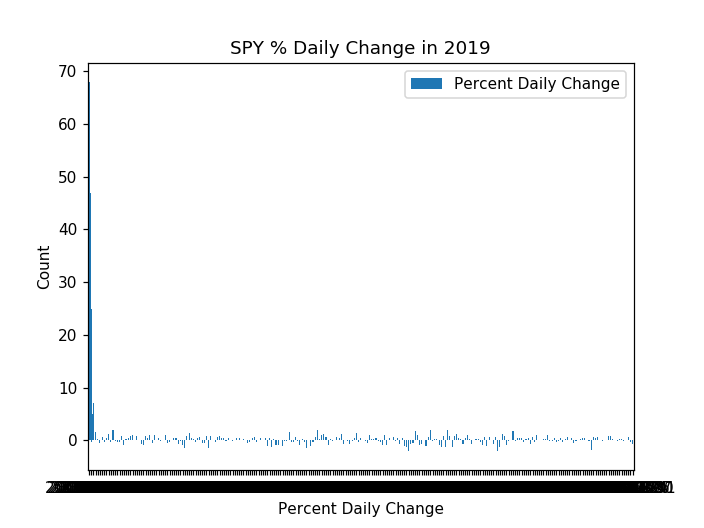

In [62]:
# Bar Plot

SPY2019.plot(x = "Date", y = "Percent Daily Change", kind = "bar", rot = 0)
plt.title("SPY % Daily Change in 2019")
plt.show()
plt.savefig('SPY_Yearly_Bar_Plot.jpeg')

<IPython.core.display.Javascript object>


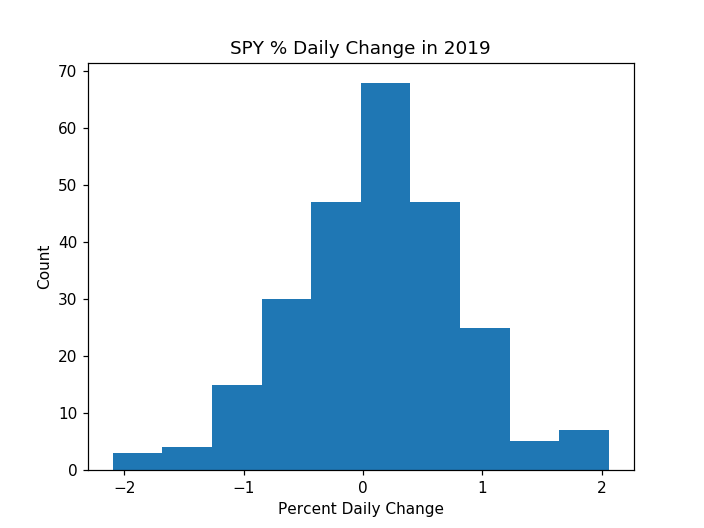

In [86]:
# Histogram
plt.hist(SPY2019["Percent Daily Change"]) 
plt.title("SPY % Daily Change in 2019")
plt.ylabel('Count')
plt.xlabel('Percent Daily Change');
plt.savefig('SPY_Yearly_Histogram.jpg')

In [55]:
# mean, standard deviation, variance, min, and max for SPY
print("The mean of the percent daily change for SPY is:")
print(SPY2019.mean()['Percent Daily Change'])
print("The standard deviation of the percent daily change for SPY is:")
print(SPY2019.std()['Percent Daily Change'])
print("The variance of the percent daily change for SPY is:")
print(SPY2019.var()['Percent Daily Change'])
print("The minimum value of the percent daily change for SPY is:")
print(SPY2019.min()['Percent Daily Change'])
print("The maximum value of the percent daily change for SPY is:")
print(SPY2019.max()['Percent Daily Change'])
print("The daily volatility for SPY is:")
dailyvar = (SPY2019.var()['Percent Daily Change'])
print(math.sqrt(dailyvar))


The mean of the percent daily change for SPY is:
0.1081150530803116
The standard deviation of the percent daily change for SPY is:
0.7214885935541037
The variance of the percent daily change for SPY is:
0.5205457906286786
The minimum value of the percent daily change for SPY is:
-2.095788271646404
The maximum value of the percent daily change for SPY is:
2.059857021689071
The daily volatility for SPY is:
0.7214885935541037


In [83]:
GBTC2019["Percent Daily Change"] = GBTC2019["Close"].pct_change() 
GBTC2019["Percent Daily Change"] = GBTC2019["Percent Daily Change"] * 100
GBTC2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
0,2019-01-02,4.155,4.155,4.155,4.155,NaN
1,2019-01-03,4.325,4.325,4.325,4.325,4.091456
2,2019-01-04,4.585,4.585,4.585,4.585,6.011561
3,2019-01-07,4.740,4.740,4.740,4.740,3.380589
4,2019-01-08,4.895,4.895,4.895,4.895,3.270042


In [84]:
GBTC2019 = GBTC2019.dropna()
GBTC2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,4.325,4.325,4.325,4.325,4.091456
2,2019-01-04,4.585,4.585,4.585,4.585,6.011561
3,2019-01-07,4.740,4.740,4.740,4.740,3.380589
4,2019-01-08,4.895,4.895,4.895,4.895,3.270042
5,2019-01-09,5.015,5.015,5.015,5.015,2.451481


<IPython.core.display.Javascript object>


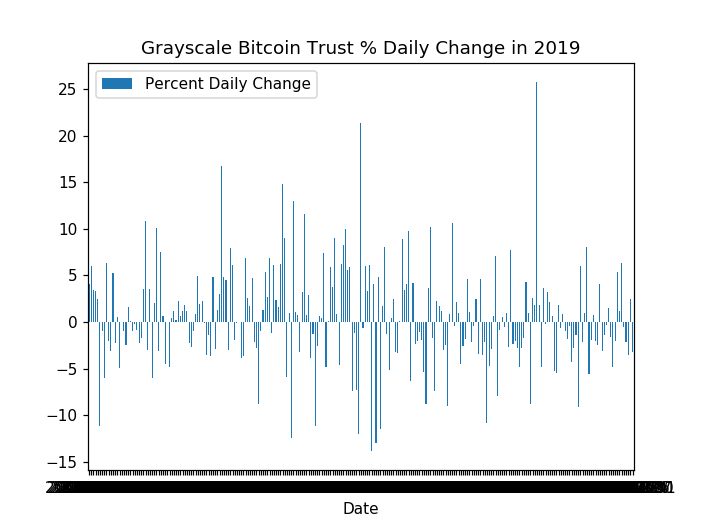

In [87]:
# Bar Plot
GBTC2019 
GBTC2019.plot(x = "Date", y = "Percent Daily Change", kind = "bar", rot = 0)
plt.title("Grayscale Bitcoin Trust % Daily Change in 2019")
plt.show()
plt.savefig('GrayScale_Bar_Plot.jpeg')

<IPython.core.display.Javascript object>


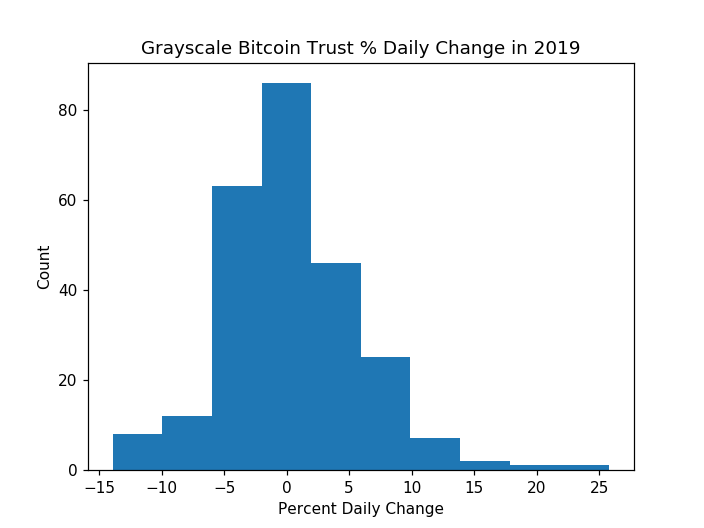

In [88]:
# Histogram
plt.hist(GBTC2019["Percent Daily Change"]) 
plt.title("Grayscale Bitcoin Trust % Daily Change in 2019")
plt.ylabel('Count')
plt.xlabel('Percent Daily Change')
plt.savefig('GrayScale_Histogram.jpg')

In [89]:
# mean, standard deviation, variance, min, and max for Bitcoin

print("The mean of the percent daily change for Bitcoin is:")
print(GBTC2019.mean()['Percent Daily Change'])
print("The standard deviation of the percent daily change for Bitcoin is:")
print(GBTC2019.std()['Percent Daily Change'])
print("The variance of the percent daily change for Bitcoin is:")
print(GBTC2019.var()['Percent Daily Change'])
print("The minimum value of the percent daily change for Bitcoin is:")
print(GBTC2019.min()['Percent Daily Change'])
print("The maximum value of the percent daily change for Bitcoin is:")
print(GBTC2019.max()['Percent Daily Change'])
print("The daily volatility for the Grayscale Bitcoin Trust is:")
dailyvar = (GBTC2019.var()['Percent Daily Change'])
print(math.sqrt(dailyvar))

The mean of the percent daily change for Bitcoin is:
0.4248585942440303
The standard deviation of the percent daily change for Bitcoin is:
5.36927804128045
The variance of the percent daily change for Bitcoin is:
28.829146684576425
The minimum value of the percent daily change for Bitcoin is:
-13.898704358068326
The maximum value of the percent daily change for Bitcoin is:
25.769669327251997
The daily volatility for the Grayscale Bitcoin Trust is:
5.36927804128045


In [90]:
Gold2019["Percent Daily Change"] = Gold2019["Close"].pct_change() 
Gold2019["Percent Daily Change"] = Gold2019["Percent Daily Change"] * 100
Gold2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
0,2019-01-02,121.35,121.35,121.35,121.35,NaN
1,2019-01-03,121.78,121.78,121.78,121.78,0.354347
2,2019-01-04,121.32,121.32,121.32,121.32,-0.377730
3,2019-01-07,122.16,122.16,122.16,122.16,0.692384
4,2019-01-08,121.15,121.15,121.15,121.15,-0.826785


In [91]:
Gold2019 = Gold2019.dropna()
Gold2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,121.78,121.78,121.78,121.78,0.354347
2,2019-01-04,121.32,121.32,121.32,121.32,-0.377730
3,2019-01-07,122.16,122.16,122.16,122.16,0.692384
4,2019-01-08,121.15,121.15,121.15,121.15,-0.826785
5,2019-01-09,121.45,121.45,121.45,121.45,0.247627


<IPython.core.display.Javascript object>


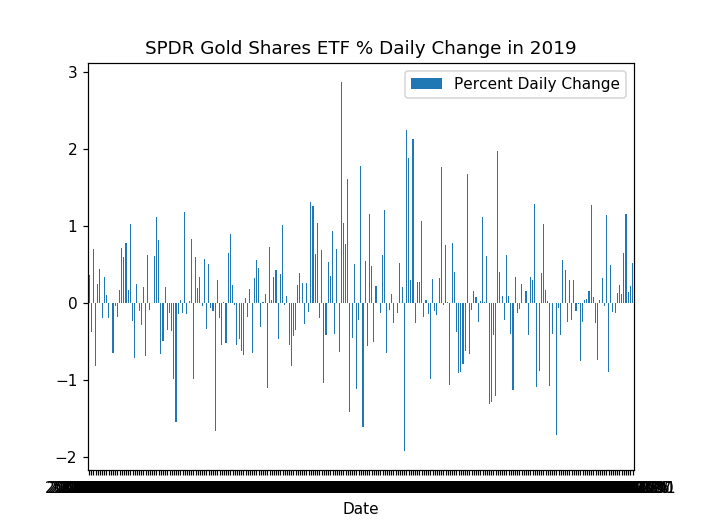

In [92]:
# Barplot
Gold2019.plot(x = "Date", y = "Percent Daily Change", kind = "bar", rot = 0)
plt.title("SPDR Gold Shares ETF % Daily Change in 2019")
plt.show()
plt.savefig('Gold_BarPlot.jpg')

<IPython.core.display.Javascript object>


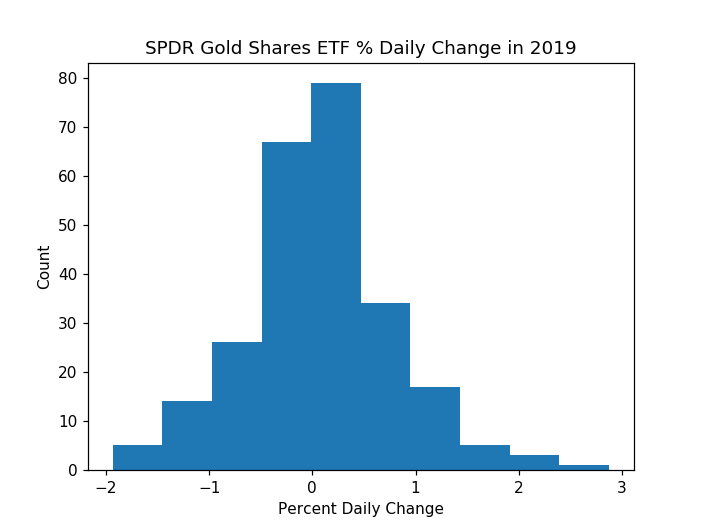

In [93]:
# Histogram
plt.hist(Gold2019["Percent Daily Change"]) 
plt.title("SPDR Gold Shares ETF % Daily Change in 2019")
plt.ylabel('Count')
plt.xlabel('Percent Daily Change');
plt.savefig('Gold_Histogram.jpg')

In [94]:
# mean, standard deviation, variance, min, and max for the SPDR Gold Shares ETF
print("The mean of the percent daily change for SPDR Gold Shares ETF is:")
print(Gold2019.mean()['Percent Daily Change'])
print("The standard deviation of the percent daily change for SPDR Gold Shares ETF is:")
print(Gold2019.std()['Percent Daily Change'])
print("The variance of the percent daily change for SPDR Gold Shares ETF is:")
print(Gold2019.var()['Percent Daily Change'])
print("The minimum value of the percent daily change for SPDR Gold Shares ETF is:")
print(Gold2019.min()['Percent Daily Change'])
print("The maximum value of the percent daily change for SPDR Gold Shares ETF is:")
print(Gold2019.max()['Percent Daily Change'])
print("The daily volatility for SPDR Gold Shares ETF is:")
dailyvar = (Gold2019.var()['Percent Daily Change'])
print(math.sqrt(dailyvar))

The mean of the percent daily change for SPDR Gold Shares ETF is:
0.06881973469003283
The standard deviation of the percent daily change for SPDR Gold Shares ETF is:
0.7136327783435301
The variance of the percent daily change for SPDR Gold Shares ETF is:
0.509271742326306
The minimum value of the percent daily change for SPDR Gold Shares ETF is:
-1.9329037991557496
The maximum value of the percent daily change for SPDR Gold Shares ETF is:
2.8713418001104385
The daily volatility for SPDR Gold Shares ETF is:
0.7136327783435301


In [95]:
Walmart2019["Percent Daily Change"] = Walmart2019["Close"].pct_change() 
Walmart2019["Percent Daily Change"] = Walmart2019["Percent Daily Change"] * 100
Walmart2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
0,2019-01-02,91.64,91.64,91.64,91.64,NaN
1,2019-01-03,93.21,93.21,93.21,93.21,1.713226
2,2019-01-04,93.21,93.21,93.21,93.21,0.000000
3,2019-01-07,93.62,93.62,93.62,93.62,0.439867
4,2019-01-08,95.06,95.06,95.06,95.06,1.538133


In [96]:
Walmart2019 = Walmart2019.dropna()
Walmart2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,93.21,93.21,93.21,93.21,1.713226
2,2019-01-04,93.21,93.21,93.21,93.21,0.000000
3,2019-01-07,93.62,93.62,93.62,93.62,0.439867
4,2019-01-08,95.06,95.06,95.06,95.06,1.538133
5,2019-01-09,95.71,95.71,95.71,95.71,0.683779


<IPython.core.display.Javascript object>


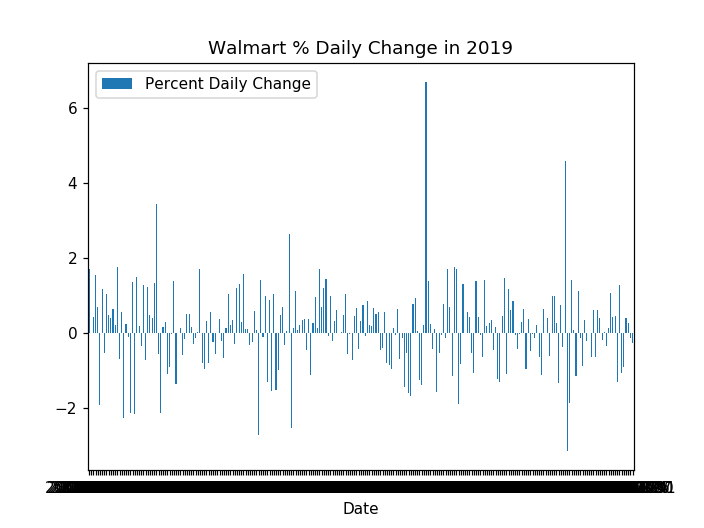

In [97]:
# Bar Plot

Walmart2019.plot(x = "Date", y = "Percent Daily Change", kind = "bar", rot = 0)
plt.title("Walmart % Daily Change in 2019")
plt.show()
plt.savefig('Walmart_Barplot.jpg')

<IPython.core.display.Javascript object>


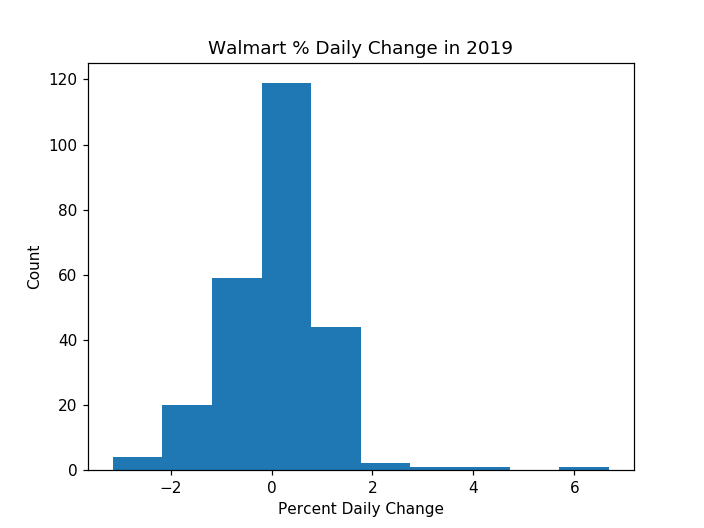

In [98]:
# Histogram
plt.hist(Walmart2019["Percent Daily Change"]) 
plt.title("Walmart % Daily Change in 2019")
plt.ylabel('Count')
plt.xlabel('Percent Daily Change')
plt.savefig('Walmart_Histogram.jpg')

In [99]:
# mean, standard deviation, variance, min, and max for Walmart

print("The mean of the percent daily change for Walmart is:")
print(Walmart2019.mean()['Percent Daily Change'])
print("The standard deviation of the percent daily change for Walmart is:")
print(Walmart2019.std()['Percent Daily Change'])
print("The variance of the percent daily change for Walmart is:")
print(Walmart2019.var()['Percent Daily Change'])
print("The minimum value of the percent daily change for Walmart is:")
print(Walmart2019.min()['Percent Daily Change'])
print("The maximum value of the percent daily change for Walmart is:")
print(Walmart2019.max()['Percent Daily Change'])
print("The daily volatility for Walmart is:")
dailyvar = (Walmart2019.var()['Percent Daily Change'])
print(math.sqrt(dailyvar))

The mean of the percent daily change for Walmart is:
0.1114389722262925
The standard deviation of the percent daily change for Walmart is:
1.066791835904051
The variance of the percent daily change for Walmart is:
1.1380448211515353
The minimum value of the percent daily change for Walmart is:
-3.146067415730325
The maximum value of the percent daily change for Walmart is:
6.6837315130830355
The daily volatility for Walmart is:
1.066791835904051


In [100]:
Amazon2019["Percent Daily Change"] = Amazon2019["Close"].pct_change() 
Amazon2019["Percent Daily Change"] = Amazon2019["Percent Daily Change"] * 100
Amazon2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
0,2019-01-02,1465.20,1465.20,1465.20,1465.20,NaN
1,2019-01-03,1520.01,1520.01,1520.01,1520.01,3.740786
2,2019-01-04,1530.00,1530.00,1530.00,1530.00,0.657233
3,2019-01-07,1602.31,1602.31,1602.31,1602.31,4.726144
4,2019-01-08,1664.69,1664.69,1664.69,1664.69,3.893129


In [101]:
Amazon2019 = Amazon2019.dropna()
Amazon2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,1520.01,1520.01,1520.01,1520.01,3.740786
2,2019-01-04,1530.00,1530.00,1530.00,1530.00,0.657233
3,2019-01-07,1602.31,1602.31,1602.31,1602.31,4.726144
4,2019-01-08,1664.69,1664.69,1664.69,1664.69,3.893129
5,2019-01-09,1652.98,1652.98,1652.98,1652.98,-0.703434


<IPython.core.display.Javascript object>


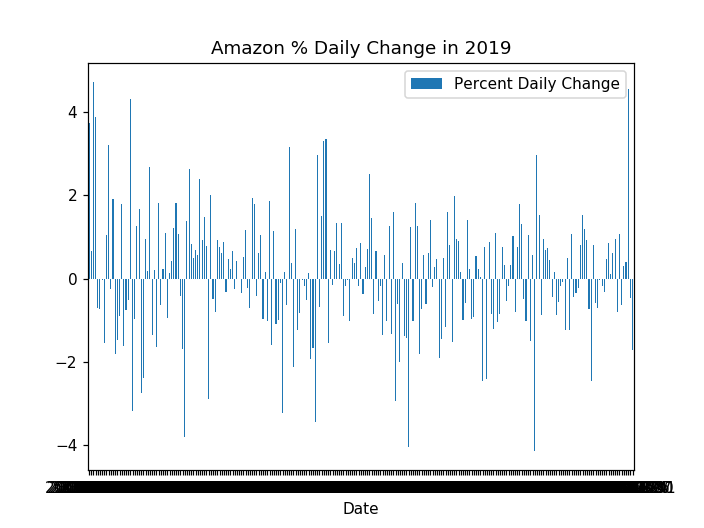

In [102]:
# Barplot
Amazon2019.plot(x = "Date", y = "Percent Daily Change", kind = "bar", rot =0)
plt.title("Amazon % Daily Change in 2019")
plt.show()
plt.savefig('Amazon_Barplot.jpg')

<IPython.core.display.Javascript object>


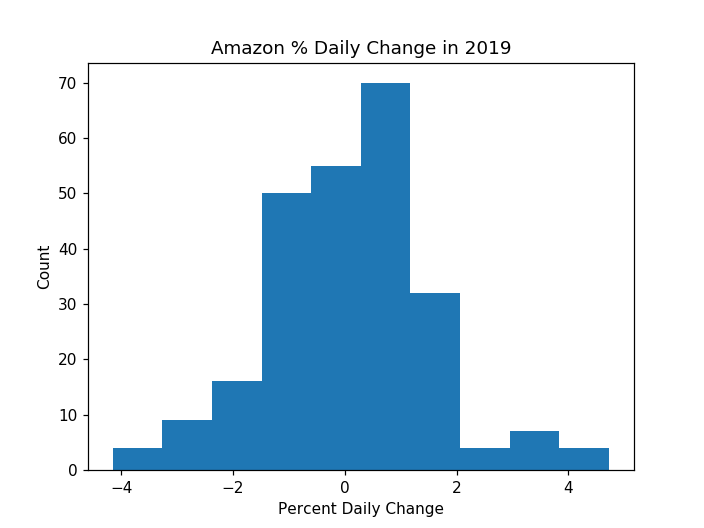

In [103]:
plt.hist(Amazon2019["Percent Daily Change"]) 
plt.title("Amazon % Daily Change in 2019")
plt.ylabel('Count')
plt.xlabel('Percent Daily Change')
plt.savefig('Amazon_Histogram.jpg')

In [104]:
# mean, standard deviation, variance, min, and max for Amazon

print("The mean of the percent daily change for Amazon is:")
print(Amazon2019.mean()['Percent Daily Change'])
print("The standard deviation of the percent daily change for Amazon is:")
print(Amazon2019.std()['Percent Daily Change'])
print("The variance of the percent daily change for Amazon is:")
print(Amazon2019.var()['Percent Daily Change'])
print("The minimum value of the percent daily change for Amazon is:")
print(Amazon2019.min()['Percent Daily Change'])
print("The maximum value of the percent daily change for Amazon is:")
print(Amazon2019.max()['Percent Daily Change'])
print("The daily volatility for Amazon is:")
dailyvar = (Amazon2019.var()['Percent Daily Change'])
print(math.sqrt(dailyvar))

The mean of the percent daily change for Amazon is:
0.10165900384353468
The standard deviation of the percent daily change for Amazon is:
1.4489744616124522
The variance of the percent daily change for Amazon is:
2.0995269904050957
The minimum value of the percent daily change for Amazon is:
-4.152245227515261
The maximum value of the percent daily change for Amazon is:
4.7261437908496795
The daily volatility for Amazon is:
1.4489744616124522


In [105]:
Square2019["Percent Daily Change"] = Square2019["Close"].pct_change() 
Square2019["Percent Daily Change"] = Square2019["Percent Daily Change"] * 100
Square2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
0,2019-01-02,54.10,54.10,54.10,54.10,NaN
1,2019-01-03,55.58,55.58,55.58,55.58,2.735675
2,2019-01-04,54.40,54.40,54.40,54.40,-2.123066
3,2019-01-07,59.00,59.00,59.00,59.00,8.455882
4,2019-01-08,62.60,62.60,62.60,62.60,6.101695


In [106]:
Square2019 = Square2019.dropna()
Square2019.head()

,Date,Open,High,Low,Close,Percent Daily Change
1,2019-01-03,55.58,55.58,55.58,55.58,2.735675
2,2019-01-04,54.40,54.40,54.40,54.40,-2.123066
3,2019-01-07,59.00,59.00,59.00,59.00,8.455882
4,2019-01-08,62.60,62.60,62.60,62.60,6.101695
5,2019-01-09,63.30,63.30,63.30,63.30,1.118211


<IPython.core.display.Javascript object>


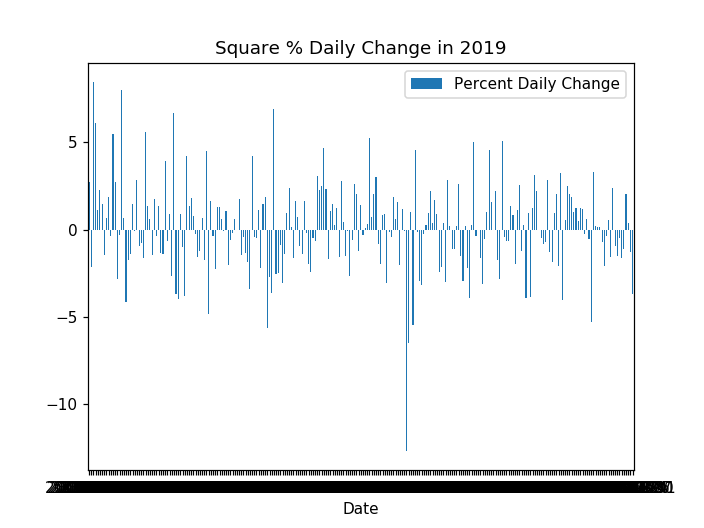

In [107]:
# Bar plot
Square2019.plot(x = "Date", y = "Percent Daily Change", kind = "bar", rot =0)
plt.title("Square % Daily Change in 2019")
plt.show()
plt.savefig('Square_Bar.jpg')

<IPython.core.display.Javascript object>


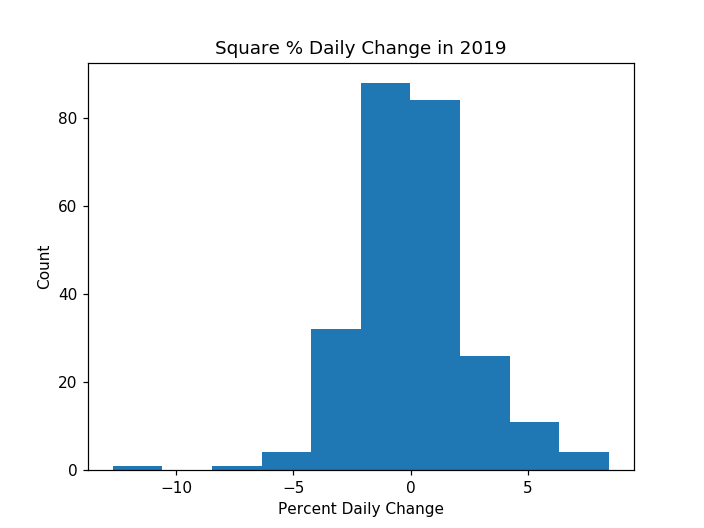

In [108]:
# Histogram
plt.hist(Square2019["Percent Daily Change"]) 
plt.title("Square % Daily Change in 2019")
plt.ylabel('Count')
plt.xlabel('Percent Daily Change');
plt.savefig('Square_Histogram.jpg')

In [109]:
# mean, standard deviation, variance, min, and max for Square
print("The mean of the percent daily change for Square is:")
print(Square2019.mean()['Percent Daily Change'])
print("The standard deviation of the percent daily change for Square is:")
print(Square2019.std()['Percent Daily Change'])
print("The variance of the percent daily change for Square is:")
print(Square2019.var()['Percent Daily Change'])
print("The minimum value of the percent daily change for Square is:")
print(Square2019.min()['Percent Daily Change'])
print("The maximum value of the percent daily change for Square is:")
print(Square2019.max()['Percent Daily Change'])
print("The daily volatility for Square is:")
dailyvar = (Square2019.var()['Percent Daily Change'])
print(math.sqrt(dailyvar))

The mean of the percent daily change for Square is:
0.08007494202735972
The standard deviation of the percent daily change for Square is:
2.501078280966825
The variance of the percent daily change for Square is:
6.255392567523968
The minimum value of the percent daily change for Square is:
-12.700369913686805
The maximum value of the percent daily change for Square is:
8.455882352941169
The daily volatility for Square is:
2.501078280966825


In [ ]:
The mean of the percent daily change for SPY is:
0.1081150530803116
The standard deviation of the percent daily change for SPY is:
0.7214885935541037
The variance of the percent daily change for SPY is:
0.5205457906286786
The minimum value of the percent daily change for SPY is:
-2.095788271646404
The maximum value of the percent daily change for SPY is:
2.059857021689071
The daily volatility for SPY is:
0.7214885935541037


In [128]:
data = {'Asset':['SPY','GBTC','SPDR Gold ETF','Walmart','Amazon','Square'],
       'Mean Percent Daily Change':[0.11,0.42,0.07,0.11,0.10,0.08],
       'Daily Volatility':[0.72,5.37,0.71,1.07,1.45,2.50],
        'Yearly Percent Returns':[28.65,103.85,17.78,28.21,25.72,10.02],
       'Variance Percent Daily Change':[0.52,28.83,0.51,1.14,2.10,6.26],
       'Minimum Percent Daily Change':[-2.10,-13.90,-1.93,-3.15,-4.15,-12.70],
       'Maximum Percent Daily Change':[2.06,25.77,2.87,6.68,4.73,8.46]}
stocks = pd.DataFrame(data)
stocks


,Asset,Mean Percent Daily Change,Daily Volatility,Yearly Percent Returns,Variance Percent Daily Change,Minimum Percent Daily Change,Maximum Percent Daily Change
0,SPY,0.11,0.72,28.65,0.52,-2.10,2.06
1,GBTC,0.42,5.37,103.85,28.83,-13.90,25.77
2,SPDR Gold ETF,0.07,0.71,17.78,0.51,-1.93,2.87
3,Walmart,0.11,1.07,28.21,1.14,-3.15,6.68
4,Amazon,0.10,1.45,25.72,2.10,-4.15,4.73
5,Square,0.08,2.50,10.02,6.26,-12.70,8.46


<IPython.core.display.Javascript object>


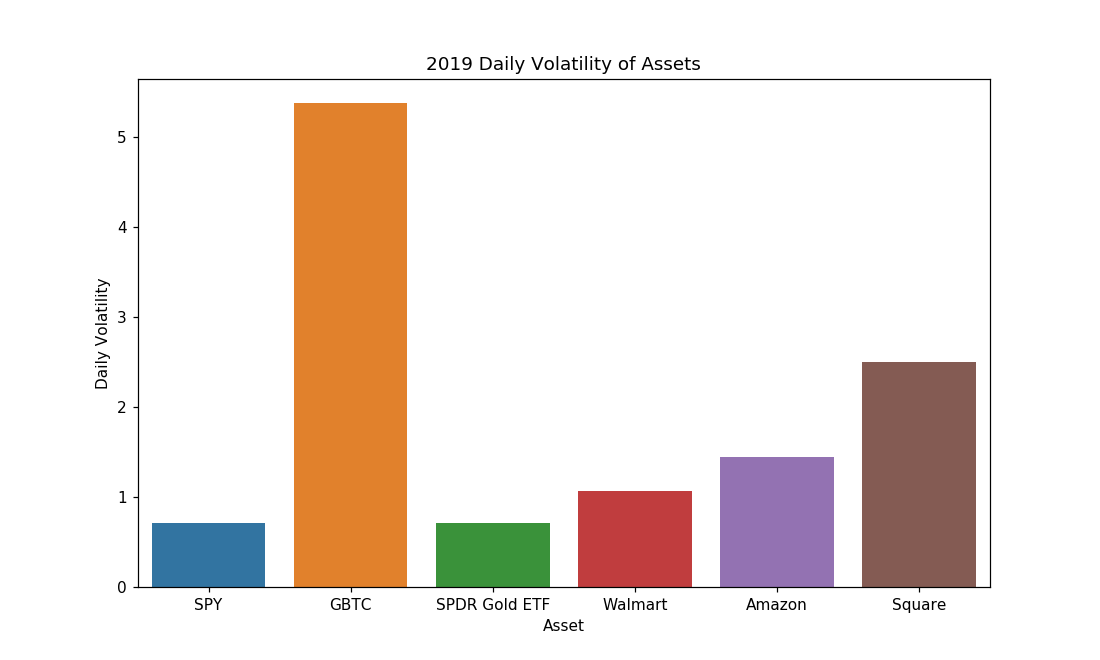

In [130]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="Asset", y="Daily Volatility", data=stocks)
plt.title("2019 Daily Volatility of Assets")
plt.show()
plt.savefig('Volality_Barplot.jpg')

<IPython.core.display.Javascript object>


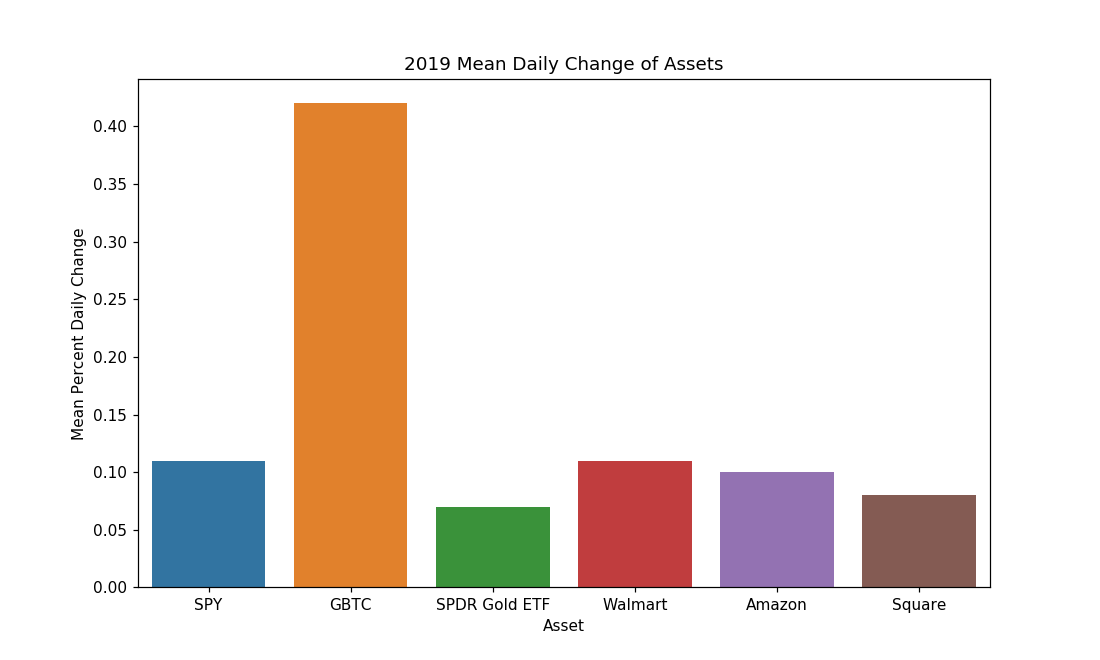

In [131]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Asset", y="Mean Percent Daily Change", data=stocks)
plt.title("2019 Mean Daily Change of Assets")
plt.show()
plt.savefig('DailyChange_Barplot.jpg')

<IPython.core.display.Javascript object>


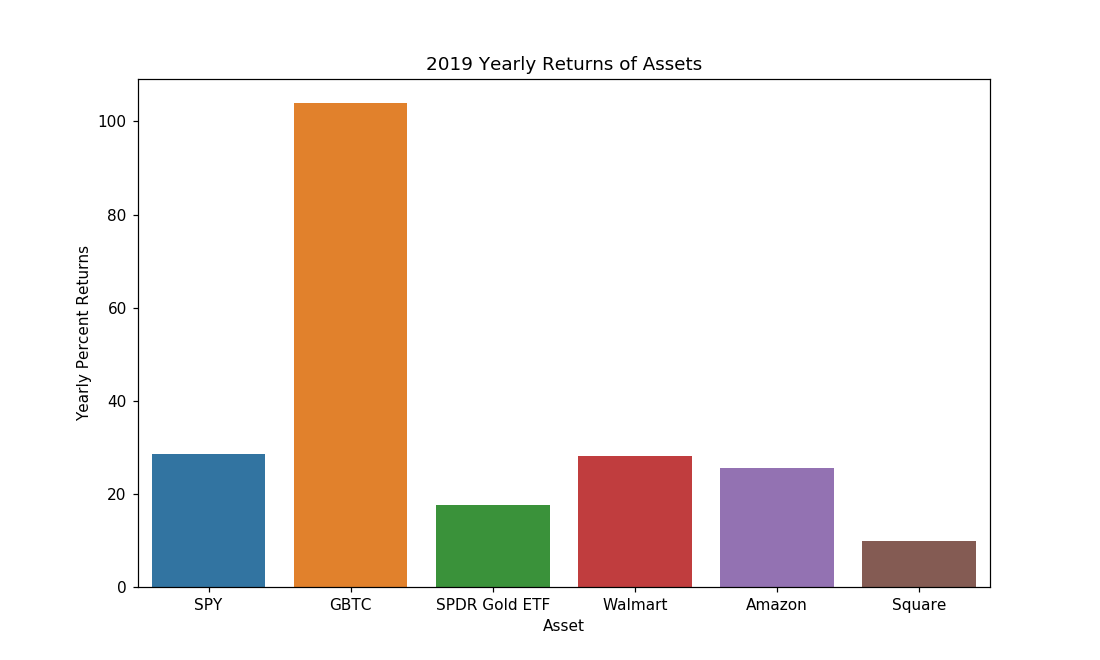

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Asset", y="Yearly Percent Returns", data=stocks)
plt.title("2019 Yearly Returns of Assets")
plt.show()
plt.savefig('YearlyReturns_Barplot.jpg')

<IPython.core.display.Javascript object>


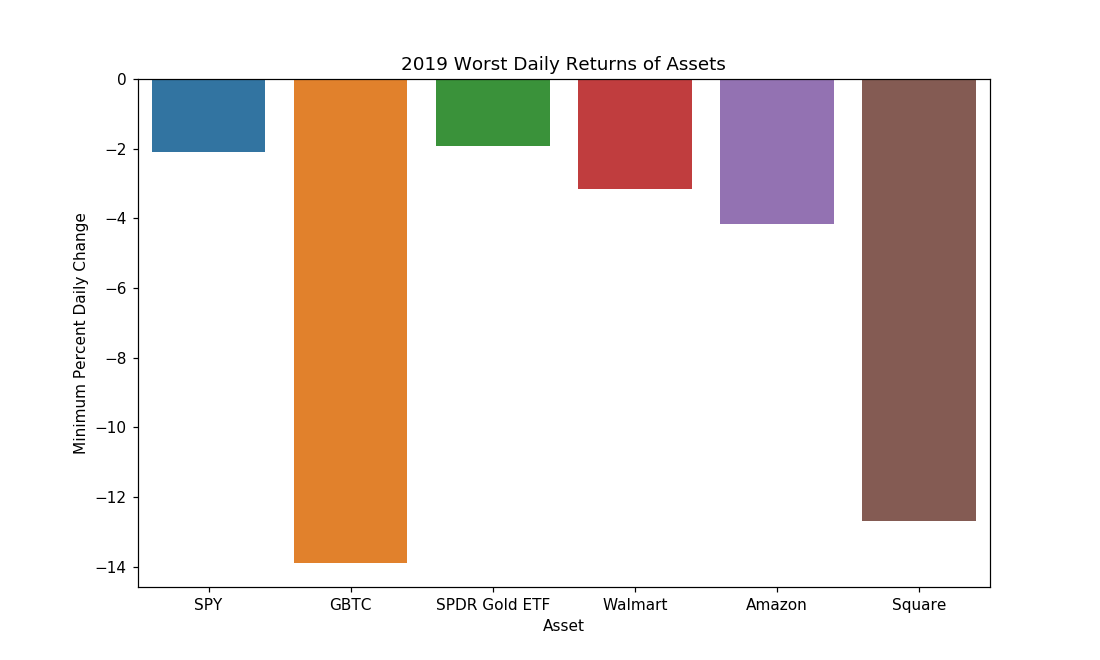

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Asset", y="Minimum Percent Daily Change", data=stocks)
plt.title("2019 Worst Daily Returns of Assets")
plt.show()
plt.savefig('Min_Barplot.jpg')

<IPython.core.display.Javascript object>


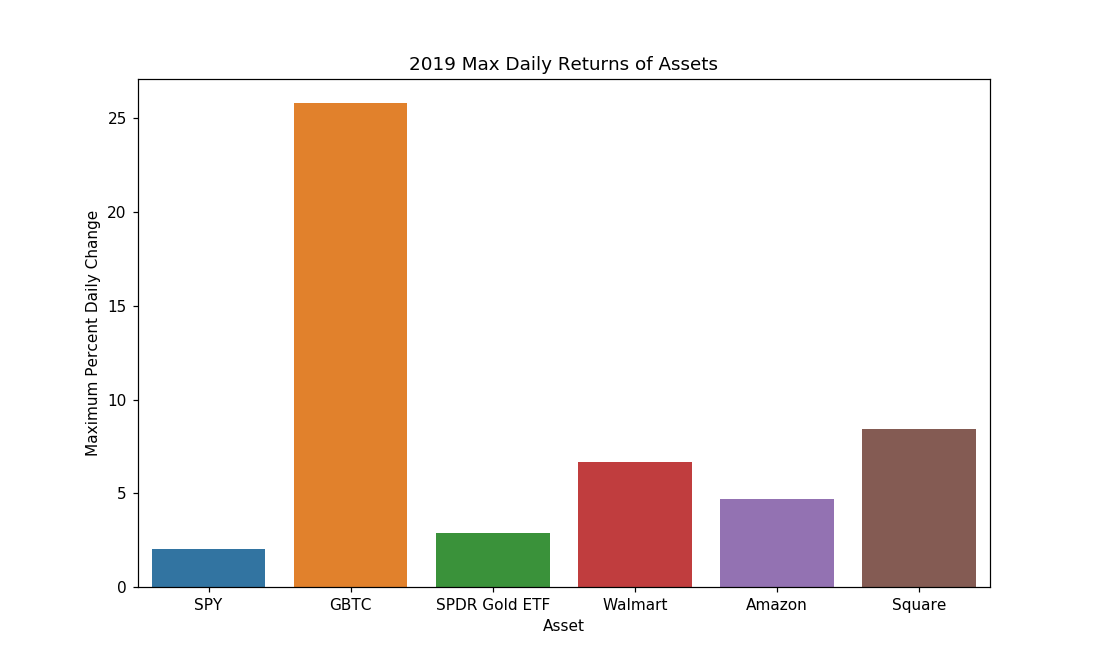

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Asset", y="Maximum Percent Daily Change", data=stocks)
plt.title("2019 Max Daily Returns of Assets")
plt.show()
plt.savefig('Max_Barplot.jpg')

In [91]:
# Part 3 Regression Analysis
# Regression Analysis
# 1. Using scikit-learn, perform five linear regressions for each of the five assets against the S&P 500. 
# Y should be % change S&P 500. X should be % change for each asset.
# For each regression, plot the samples and the linear model. Label the Y axis as S&P 500 and the X axis as each asset.
#Calculate and display the intercept, coefficient (slope), R2, and the Mean squared error.
# Which asset is highly correlated with the S&P 500 and which asset is the least correlated?



<IPython.core.display.Javascript object>


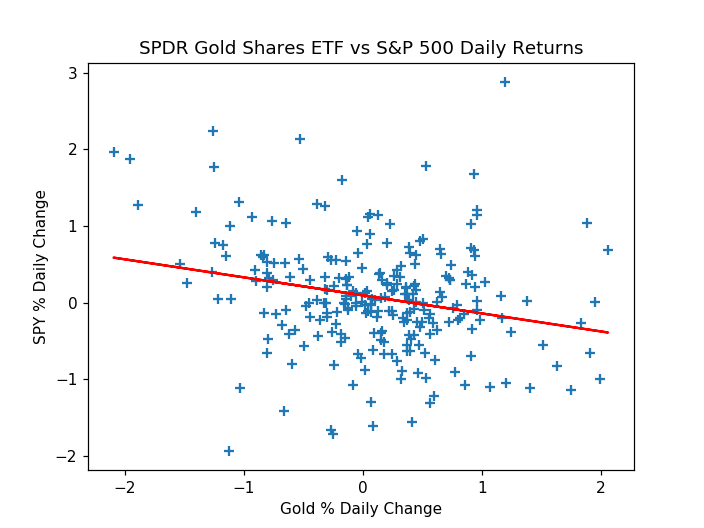

In [136]:
#Regression Analysis - SPY v Gold

#prepping and fitting the data
spyvgold = pd.concat((Gold2019["Percent Daily Change"],SPY2019["Percent Daily Change"]),\
                     axis=1,)
spyvgold.columns=["Gold","SPY"]
reg = linear_model.LinearRegression()
reg.fit(spyvgold[['SPY']],spyvgold.Gold)

#Plotting the graph and the regression line
plt.scatter(spyvgold.SPY,spyvgold.Gold, marker = '+')
plt.title('SPDR Gold Shares ETF vs S&P 500 Daily Returns')
plt.xlabel('Gold % Daily Change')
plt.ylabel('SPY % Daily Change')
plt.plot(spyvgold.SPY,reg.predict(spyvgold[['SPY']]),color='red')

## Important!! Before moving on please press the power button to turn off the plot and be able to see the next one!

In [137]:
#Regression Statistics for SPY v Gold
print("Regression Statistics for SPY against SPDR Gold Shares ETF")
print("Intercept:", reg.intercept_)
print("Coefficient:",reg.coef_)
print("R squared:", reg.score(spyvgold[['SPY']],spyvgold.Gold))
print("Mean Squared Error:", mean_squared_error(spyvgold[['SPY']],spyvgold.Gold))

Regression Statistics for SPY against SPDR Gold Shares ETF
Intercept: 0.09424017751882593
Coefficient: [-0.23512399]
R squared: 0.056507130170804776
Mean Squared Error: 1.2710691630112476


<IPython.core.display.Javascript object>


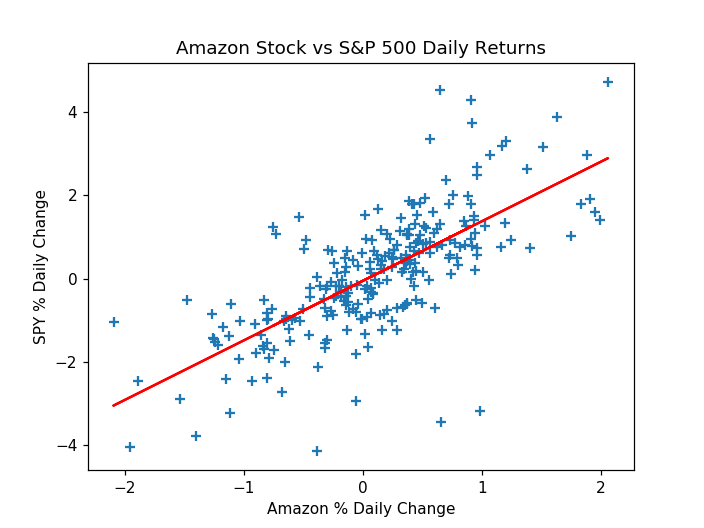

In [138]:
#Regression Analysis - SPY v Amazon

#prepping and fitting the data
spyvAmazon = pd.concat((Amazon2019["Percent Daily Change"],SPY2019["Percent Daily Change"]),\
                     axis=1,).dropna()
spyvAmazon.columns=["Amazon","SPY"]
reg = linear_model.LinearRegression()
reg.fit(spyvAmazon[['SPY']],spyvAmazon.Amazon)

#Plotting the graph and the regression line
plt.scatter(spyvAmazon.SPY,spyvAmazon.Amazon, marker = '+')
plt.title('Amazon Stock vs S&P 500 Daily Returns')
plt.xlabel('Amazon % Daily Change')
plt.ylabel('SPY % Daily Change')
plt.plot(spyvAmazon.SPY,reg.predict(spyvAmazon[['SPY']]),color='red')

## Important!! Before moving on please press the power button to turn off the plot and be able to see the next one!

In [140]:
#Regression Statistics for SPY v Amazon
print("Regression Statistics for SPY against Amazon")
print("Intercept:", reg.intercept_)
print("Coefficient:",reg.coef_)
print("R squared:", reg.score(spyvAmazon[['SPY']],spyvAmazon.Amazon))
print("Mean Squared Error:", mean_squared_error(spyvAmazon[['SPY']],spyvAmazon.Amazon))

Regression Statistics for SPY against Amazon
Intercept: -0.05327138732827541
Coefficient: [1.43301406]
R squared: 0.5091413618742577
Mean Squared Error: 1.1237208710571176


<IPython.core.display.Javascript object>


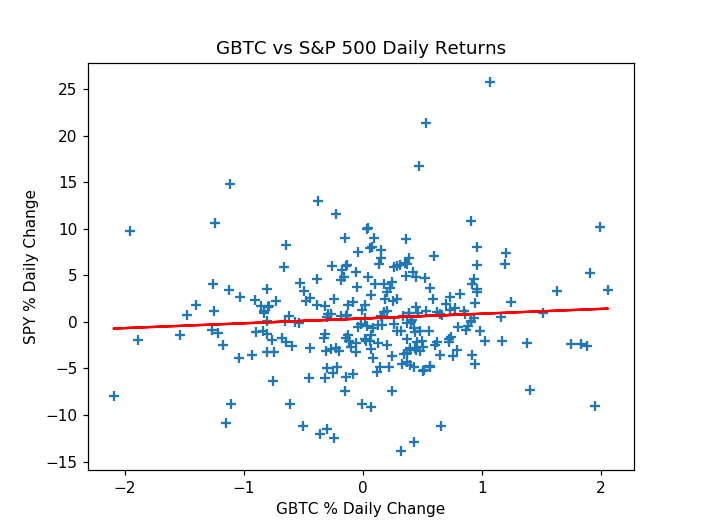

In [141]:
#Regression Analysis - SPY v GBTC

#prepping and fitting the data
spyvGBTC = pd.concat((GBTC2019["Percent Daily Change"],SPY2019["Percent Daily Change"]),\
                     axis=1,)
spyvGBTC.columns=["GBTC","SPY"]
reg = linear_model.LinearRegression()
reg.fit(spyvGBTC[['SPY']],spyvGBTC.GBTC)

#Plotting the graph and the regression line
plt.scatter(spyvGBTC.SPY,spyvGBTC.GBTC, marker = '+')
plt.title('GBTC vs S&P 500 Daily Returns')
plt.xlabel('GBTC % Daily Change')
plt.ylabel('SPY % Daily Change')
plt.plot(spyvGBTC.SPY,reg.predict(spyvGBTC[['SPY']]),color='red')

## Important!! Before moving on please press the power button to turn off the plot and be able to see the next one!


In [142]:
#Regression Statistics for SPY v GBTC
print("Regression Statistics for SPY against Grayscale Bitcoin Trust")
print("Intercept:", reg.intercept_)
print("Coefficient:",reg.coef_)
print("R squared:", reg.score(spyvGBTC[['SPY']],spyvGBTC.GBTC))
print("Mean Squared Error:", mean_squared_error(spyvGBTC[['SPY']],spyvGBTC.GBTC))


Regression Statistics for SPY against Grayscale Bitcoin Trust
Intercept: 0.36913015585594616
Coefficient: [0.51545494]
R squared: 0.004797429113174934
Mean Squared Error: 28.798590091216585


<IPython.core.display.Javascript object>


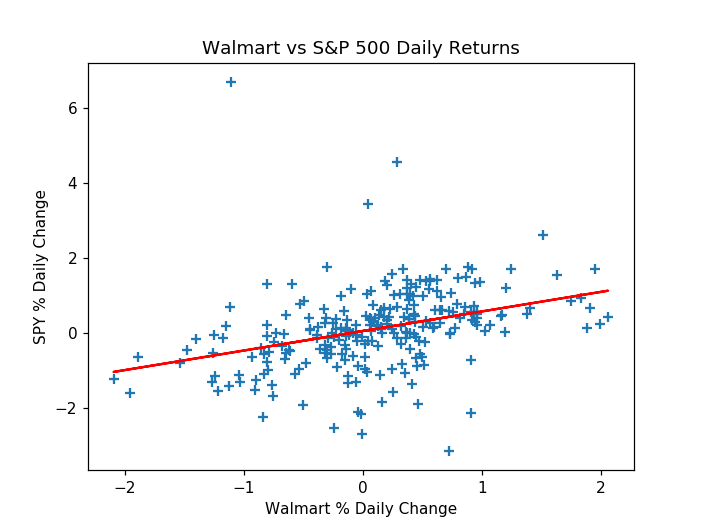

In [143]:
#Regression Analysis - SPY v Walmart

#prepping and fitting the data
spyvWalmart = pd.concat((Walmart2019["Percent Daily Change"],SPY2019["Percent Daily Change"]),\
                     axis=1,)
spyvWalmart.columns=["Walmart","SPY"]
reg = linear_model.LinearRegression()
reg.fit(spyvWalmart[['SPY']],spyvWalmart.Walmart)

#Plotting the graph and the regression line
plt.scatter(spyvWalmart.SPY,spyvWalmart.Walmart, marker = '+')
plt.title('Walmart vs S&P 500 Daily Returns')
plt.xlabel('Walmart % Daily Change')
plt.ylabel('SPY % Daily Change')
plt.plot(spyvWalmart.SPY,reg.predict(spyvWalmart[['SPY']]),color='red')

## Important!! Before moving on please press the power button to turn off the plot and be able to see the next one!


In [144]:
#Regression Statistics for SPY v Walmart
print("Regression Statistics for SPY against Walmart")
print("Intercept:", reg.intercept_)
print("Coefficient:",reg.coef_)
print("R squared:", reg.score(spyvWalmart[['SPY']],spyvWalmart.Walmart))
print("Mean Squared Error:", mean_squared_error(spyvWalmart[['SPY']],spyvWalmart.Walmart))


Regression Statistics for SPY against Walmart
Intercept: 0.05512604097115627
Coefficient: [0.52086115]
R squared: 0.12409192133569236
Mean Squared Error: 1.111889982597997


<IPython.core.display.Javascript object>


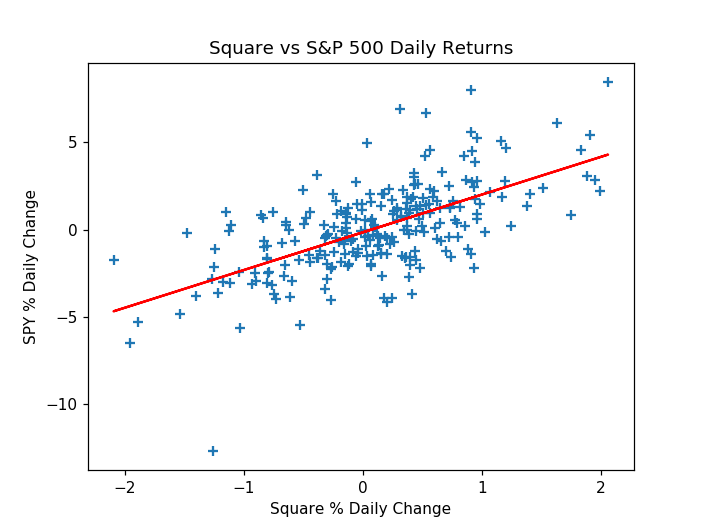

In [145]:
#Regression Analysis - SPY v Square

#prepping and fitting the data
spyvSquare = pd.concat((Square2019["Percent Daily Change"],SPY2019["Percent Daily Change"]),\
                     axis=1,)
spyvSquare.columns=["Square","SPY"]
reg = linear_model.LinearRegression()
reg.fit(spyvSquare[['SPY']],spyvSquare.Square)

#Plotting the graph and the regression line
plt.scatter(spyvSquare.SPY,spyvSquare.Square, marker = '+')
plt.title('Square vs S&P 500 Daily Returns')
plt.xlabel('Square % Daily Change')
plt.ylabel('SPY % Daily Change')
plt.plot(spyvSquare.SPY,reg.predict(spyvSquare[['SPY']]),color='red')


## Important!! Before moving on please press the power button to turn off the plot and be able to see the next one!



In [146]:
#Regression Statistics for SPY v Square
print("Regression Statistics for SPY against Square Inc")
print("Intercept:", reg.intercept_)
print("Coefficient:",reg.coef_)
print("R squared:", reg.score(spyvSquare[['SPY']],spyvSquare.Square))
print("Mean Squared Error:", mean_squared_error(spyvSquare[['SPY']],spyvSquare.Square))


Regression Statistics for SPY against Square Inc
Intercept: -0.15351698406833536
Coefficient: [2.16058652]
R squared: 0.3884612405851683
Mean Squared Error: 4.5093220282222815


In [113]:
print("In conclusion, the asset most correlated with the S&P 500 was Amazon with an R^2 of .509")
print("The asset least correlated with the S&P 500 was GBTC with an R^2 of .005")

In conclusion, the asset most correlated with the S&P 500 was Amazon with an R^2 of .509
The asset least correlated with the S&P 500 was GBTC with an R^2 of .005
